شرکتی شما را استخدام کرده تا داده هایی که دیتا آنلیزور شرکت به صورت محرمانه در آورده را تحلیل کنید دیتاهای مورد نیاز گذاشته شده

استفاده کنید catboost راهنمایی: از کتابخانه

# کتابخانه های مقدماتی و دیتای مربوطه را فراخوانی میکنیم 

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import boxcox

In [52]:
df = pd.read_csv('train.csv')
df

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
188314,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
188315,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
188316,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87


# بررسی های اولیه و کلی داده ها را انجام دادیم. دیتای گمشده ای در بین داده ها یافت نشد. ۱۳۲ فیچر وجود دارد که ۱۴ تای آن عددی هستند و باقی آنها کتگوریکال هستند 

In [53]:
df.isnull().sum().sort_values()

id       0
cat96    0
cat95    0
cat94    0
cat93    0
        ..
cat36    0
cat35    0
cat34    0
cat48    0
loss     0
Length: 132, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [55]:
df.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
           ...   
cont11    float64
cont12    float64
cont13    float64
cont14    float64
loss      float64
Length: 132, dtype: object

In [56]:
df.nunique()

id        188318
cat1           2
cat2           2
cat3           2
cat4           2
           ...  
cont11       326
cont12       328
cont13       353
cont14     18740
loss      158223
Length: 132, dtype: int64

# طبق جدول کورلیشن زیر از بین داده های عددی ستون های ۹و۱−۶و۱۰−۱۱و۱۲ ارتباط زیادی وجود دارد . چون اطلاعات ستون ها را نمیدانیم به کارفرما باید اعلام کنیم که این ستونها ارتباط زیادی دارند اگر حاوی اطلاعات یکسانی هستند اقدام به حذف یکی از آنها کنیم اما  در این شرایظ به آن ها دست نمیزنیم. شاید ترکیب این فیچرها با فیچر های دیگر معنا دار باشد 

<AxesSubplot:>

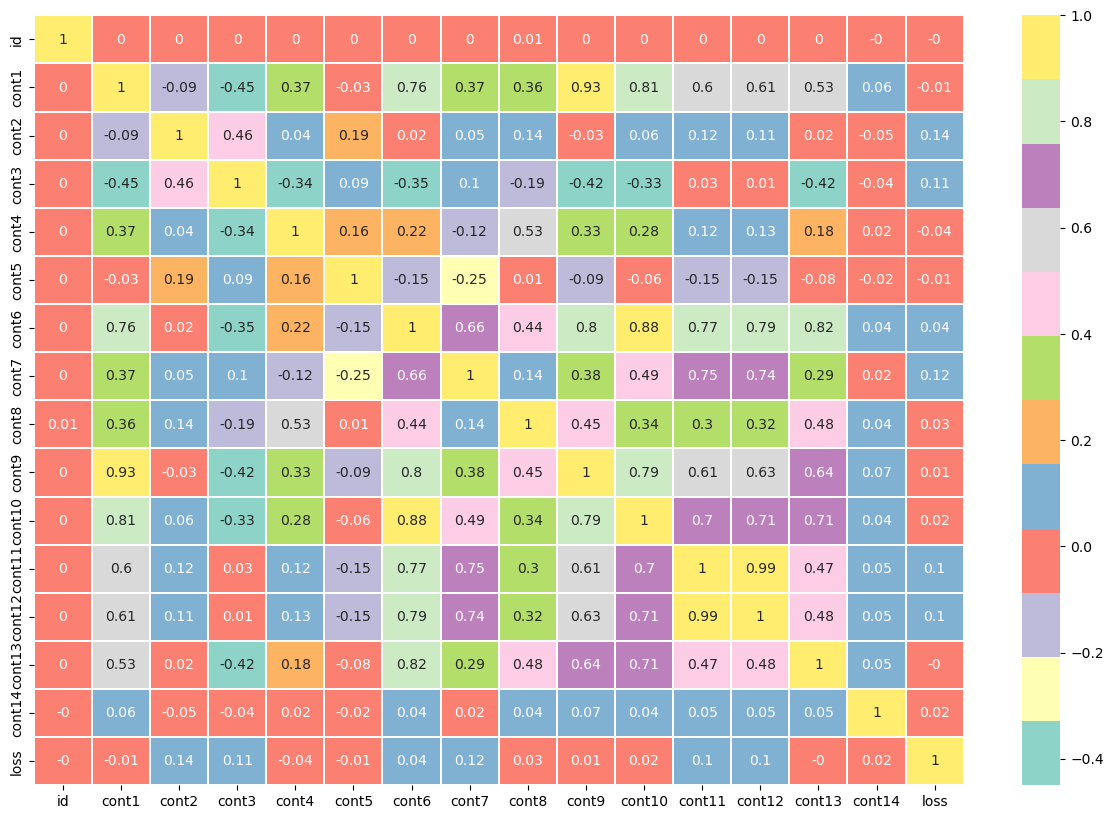

In [59]:
plt.figure(figsize = (15,10))
tc =round(df.corr(numeric_only=True),2)
sns.heatmap(tc, annot = True, cmap = 'Set3', linecolor = 'white', linewidths=0.1)

# توزیع داده های ستون تارگت دیتا را بررسی میکنیم . همان طور که مشاهده میشود دارای چولگی شدید است  روشهای زیر را بر روی آن بررسی کردیم و دیدیم که روش باکس کاکس روی آن بهتر چولگی را از بین میبرد. لذا بعد از اسپیلیت کردن داده ها برای انکه لیکیج اطلاعات ایجاد نشود روش کاکس باکس را بر روی تارگت ها اعمال میکنیم 

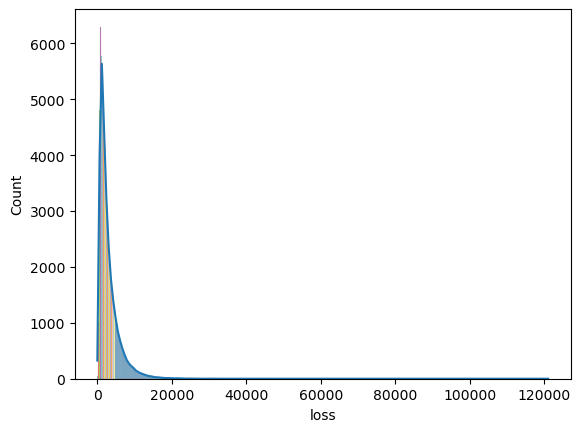

In [64]:
plot = sns.histplot(df['loss'], kde=True )
for bin_,i in zip(plot.patches,sns.color_palette("Set3",50)):
    bin_.set_facecolor(i)

In [65]:
print("Untransformed Skew:", df["loss"].skew())
print("Log transformed Skew:",np.log(df["loss"].skew()))
print("Sqrt transformed Skew:",np.sqrt(df["loss"].skew()))
print("Boxcox transformed Skew:",pd.Series(boxcox(df['loss'], 0.4)).skew())

Untransformed Skew: 3.7949583775378604
Log transformed Skew: 1.3336734430767387
Sqrt transformed Skew: 1.9480652908816636
Boxcox transformed Skew: 1.0001092645476422


In [66]:
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from catboost import Pool , cv
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoost

#  اسپیلت داده ها را انجام میدهیم و باکس کاکس را اعمال میکنیم

In [10]:
y = df['loss']
X = df.drop(columns='loss')

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=32)

In [12]:
y_train = boxcox(y_train, 0.4)
y_valid = boxcox(y_valid, 0.4)

# از نقطه قوت های این کتابخانه معرفی ستون های کتوریکال به آن است تا بتواند بدون اینکه تغییری در ساختار داده ایجاد کنیم کتابخانه بصورت خودکار در حین انجام محاسبات ستون های کتگوریال را عددی در نظر بگیرد که با توجه به تعداد فیچر های زیاد برای این داده ها بسیار مناسب است 

In [ ]:
categorical_cols=[key for key, value in df.dtypes.items()  if value=='O']

In [14]:
train_pool = Pool(data=X_train,label = y_train,cat_features=categorical_cols)

In [15]:
model_basic = CatBoostRegressor(iterations=100,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.3,
                             od_type='Iter',
                             metric_period = 5,
                             od_wait=10)

model_basic.fit(train_pool, plot=True,silent=True)
print(model_basic.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'RMSE': 12.428324345477117}}


In [19]:
pred=model_basic.predict(X_valid)
rmse=mean_squared_error(pred,y_valid.astype('float'),squared=False)
rmse

12.537412419794084

# من به روشهای مختلف با گرید سرچ تا حد ممکن هایپر پارامترهای مدل را تیون کردم

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split( X, y,train_size=0.9, random_state=123)
train_pool = Pool(data=X_train,label = Y_train,cat_features=categorical_cols)
booster = CatBoostRegressor(iterations=100,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.3,
                             od_type='Iter',
                             metric_period = 5,
                             od_wait=10)

booster.fit(train_pool, eval_set=(X_test, Y_test))
booster.set_feature_names(df.columns)

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

from catboost.utils import eval_metric

print("\nTest  R2 : %.2f"%booster.score(X_test, Y_test))
print("Train R2 : %.2f"%booster.score(X_train, Y_train))

0:	learn: 2837.8204078	test: 2886.7244941	best: 2886.7244941 (0)	total: 683ms	remaining: 1m 7s
5:	learn: 2589.4396463	test: 2646.7808835	best: 2646.7808835 (5)	total: 2.84s	remaining: 44.6s
10:	learn: 2416.4675034	test: 2483.7800806	best: 2483.7800806 (10)	total: 4.93s	remaining: 39.9s
15:	learn: 2291.6822221	test: 2361.8827928	best: 2361.8827928 (15)	total: 7.21s	remaining: 37.8s
20:	learn: 2204.7931882	test: 2281.8729787	best: 2281.8729787 (20)	total: 9.26s	remaining: 34.9s
25:	learn: 2138.0195928	test: 2219.0626057	best: 2219.0626057 (25)	total: 11.3s	remaining: 32.1s
30:	learn: 2085.6857459	test: 2173.8754043	best: 2173.8754043 (30)	total: 13.4s	remaining: 29.8s
35:	learn: 2044.5471791	test: 2139.5434770	best: 2139.5434770 (35)	total: 15.4s	remaining: 27.5s
40:	learn: 2013.1489012	test: 2112.8548041	best: 2112.8548041 (40)	total: 17.5s	remaining: 25.1s
45:	learn: 1986.1297376	test: 2090.4420727	best: 2090.4420727 (45)	total: 19.5s	remaining: 22.9s
50:	learn: 1965.1215355	test: 2071

In [21]:
booster = CatBoostRegressor(iterations=100,
                             learning_rate=0.05,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.3,
                             od_type='Iter',
                             od_wait=10)

booster.fit(train_pool, eval_set=(X_test, Y_test))
booster.set_feature_names(df.columns)

test_preds = booster.predict(X_test)
train_preds = booster.predict(X_train)

from catboost.utils import eval_metric

print("\nTest  R2 : %.2f"%booster.score(X_test, Y_test))
print("Train R2 : %.2f"%booster.score(X_train, Y_train))

0:	learn: 2836.3543013	test: 2886.4289242	best: 2886.4289242 (0)	total: 829ms	remaining: 1m 22s
1:	learn: 2778.8840860	test: 2832.2626558	best: 2832.2626558 (1)	total: 1.8s	remaining: 1m 28s
2:	learn: 2726.1051790	test: 2783.1088573	best: 2783.1088573 (2)	total: 2.71s	remaining: 1m 27s
3:	learn: 2675.6484881	test: 2736.3535920	best: 2736.3535920 (3)	total: 3.45s	remaining: 1m 22s
4:	learn: 2628.0817198	test: 2691.5830091	best: 2691.5830091 (4)	total: 4.2s	remaining: 1m 19s
5:	learn: 2583.6556370	test: 2650.3995163	best: 2650.3995163 (5)	total: 4.95s	remaining: 1m 17s
6:	learn: 2542.3867250	test: 2612.3250127	best: 2612.3250127 (6)	total: 5.7s	remaining: 1m 15s
7:	learn: 2503.9373980	test: 2576.8172284	best: 2576.8172284 (7)	total: 6.52s	remaining: 1m 14s
8:	learn: 2469.6964998	test: 2545.4239419	best: 2545.4239419 (8)	total: 7.25s	remaining: 1m 13s
9:	learn: 2437.3883422	test: 2516.4550819	best: 2516.4550819 (9)	total: 7.97s	remaining: 1m 11s
10:	learn: 2405.9630864	test: 2488.1765090	

85:	learn: 1821.2133024	test: 2018.2194656	best: 2018.2194656 (85)	total: 1m 3s	remaining: 10.3s
86:	learn: 1819.5594892	test: 2017.4042966	best: 2017.4042966 (86)	total: 1m 4s	remaining: 9.61s
87:	learn: 1817.8989751	test: 2016.2130899	best: 2016.2130899 (87)	total: 1m 5s	remaining: 8.88s
88:	learn: 1817.8973889	test: 2016.2036567	best: 2016.2036567 (88)	total: 1m 5s	remaining: 8.07s
89:	learn: 1815.7648664	test: 2015.1567378	best: 2015.1567378 (89)	total: 1m 6s	remaining: 7.33s
90:	learn: 1814.7137784	test: 2014.1989300	best: 2014.1989300 (90)	total: 1m 6s	remaining: 6.6s
91:	learn: 1813.0656487	test: 2013.1600903	best: 2013.1600903 (91)	total: 1m 7s	remaining: 5.86s
92:	learn: 1811.4587853	test: 2012.3555439	best: 2012.3555439 (92)	total: 1m 8s	remaining: 5.14s
93:	learn: 1809.6165255	test: 2011.1913101	best: 2011.1913101 (93)	total: 1m 9s	remaining: 4.4s
94:	learn: 1807.5536966	test: 2010.3688987	best: 2010.3688987 (94)	total: 1m 9s	remaining: 3.67s
95:	learn: 1806.0972676	test: 20

In [50]:
booster = CatBoostRegressor()

params = {
            'iterations':[10,50],
            'learning_rate':[0.01, 0.1],
            'bootstrap_type':['Bayesian', 'No']
}

search_results = booster.grid_search(params, train_pool, cv=5, )

print("\nBest Params : ", search_results['params'])

0:	learn: 4148.0661552	test: 4253.0067582	best: 4253.0067582 (0)	total: 234ms	remaining: 2.1s
1:	learn: 4118.6844691	test: 4224.2145295	best: 4224.2145295 (1)	total: 461ms	remaining: 1.84s
2:	learn: 4089.7429718	test: 4195.5188768	best: 4195.5188768 (2)	total: 706ms	remaining: 1.65s
3:	learn: 4060.8332605	test: 4167.1814597	best: 4167.1814597 (3)	total: 888ms	remaining: 1.33s
4:	learn: 4032.8610790	test: 4139.8864887	best: 4139.8864887 (4)	total: 1.07s	remaining: 1.07s
5:	learn: 4005.6616738	test: 4112.8961033	best: 4112.8961033 (5)	total: 1.24s	remaining: 827ms
6:	learn: 3978.4388571	test: 4086.2910139	best: 4086.2910139 (6)	total: 1.43s	remaining: 612ms
7:	learn: 3951.4548122	test: 4059.7815637	best: 4059.7815637 (7)	total: 1.6s	remaining: 401ms
8:	learn: 3925.2506366	test: 4034.2144877	best: 4034.2144877 (8)	total: 1.78s	remaining: 198ms
9:	learn: 3898.6200508	test: 4008.2197283	best: 4008.2197283 (9)	total: 1.94s	remaining: 0us

bestTest = 4008.219728
bestIteration = 9

0:	loss: 40

41:	learn: 3213.2303657	test: 3339.5606766	best: 3339.5606766 (41)	total: 7.87s	remaining: 1.5s
42:	learn: 3195.9905746	test: 3322.8312750	best: 3322.8312750 (42)	total: 8.04s	remaining: 1.31s
43:	learn: 3179.0423507	test: 3306.5200490	best: 3306.5200490 (43)	total: 8.21s	remaining: 1.12s
44:	learn: 3162.7717821	test: 3290.6565815	best: 3290.6565815 (44)	total: 8.38s	remaining: 931ms
45:	learn: 3146.2358098	test: 3274.6450708	best: 3274.6450708 (45)	total: 8.56s	remaining: 745ms
46:	learn: 3130.1328565	test: 3259.1214247	best: 3259.1214247 (46)	total: 8.73s	remaining: 557ms
47:	learn: 3114.2725419	test: 3243.9320205	best: 3243.9320205 (47)	total: 8.9s	remaining: 371ms
48:	learn: 3098.7314351	test: 3229.0032984	best: 3229.0032984 (48)	total: 9.06s	remaining: 185ms
49:	learn: 3083.1533397	test: 3213.9568391	best: 3213.9568391 (49)	total: 9.23s	remaining: 0us

bestTest = 3213.956839
bestIteration = 49

4:	loss: 3213.9568391	best: 2652.3333412 (2)	total: 17.6s	remaining: 10.5s
0:	learn: 41

25:	learn: 2055.0713019	test: 2234.8075415	best: 2234.8075415 (25)	total: 5.48s	remaining: 5.06s
26:	learn: 2048.3191427	test: 2228.7444125	best: 2228.7444125 (26)	total: 5.65s	remaining: 4.81s
27:	learn: 2039.1754791	test: 2220.0693468	best: 2220.0693468 (27)	total: 5.88s	remaining: 4.62s
28:	learn: 2030.6470614	test: 2211.8692528	best: 2211.8692528 (28)	total: 6.07s	remaining: 4.4s
29:	learn: 2022.0874184	test: 2202.8773937	best: 2202.8773937 (29)	total: 6.27s	remaining: 4.18s
30:	learn: 2017.4409499	test: 2198.4017112	best: 2198.4017112 (30)	total: 6.47s	remaining: 3.96s
31:	learn: 2009.9366714	test: 2191.4745577	best: 2191.4745577 (31)	total: 6.65s	remaining: 3.74s
32:	learn: 2004.4291799	test: 2186.8311482	best: 2186.8311482 (32)	total: 6.82s	remaining: 3.51s
33:	learn: 1998.8279762	test: 2181.2573829	best: 2181.2573829 (33)	total: 6.99s	remaining: 3.29s
34:	learn: 1995.7693157	test: 2178.6211896	best: 2178.6211896 (34)	total: 7.16s	remaining: 3.07s
35:	learn: 1991.1669992	test: 2

9:	learn: 2551.5820098	test: 2467.7646644	best: 2467.7646644 (9)	total: 2.06s	remaining: 8.24s
10:	learn: 2481.6815377	test: 2400.9933990	best: 2400.9933990 (10)	total: 2.22s	remaining: 7.88s
11:	learn: 2422.7530537	test: 2341.8057368	best: 2341.8057368 (11)	total: 2.39s	remaining: 7.57s
12:	learn: 2372.0753295	test: 2294.9965662	best: 2294.9965662 (12)	total: 2.61s	remaining: 7.44s
13:	learn: 2329.5600139	test: 2255.9720333	best: 2255.9720333 (13)	total: 2.77s	remaining: 7.13s
14:	learn: 2290.9385776	test: 2220.4082086	best: 2220.4082086 (14)	total: 2.94s	remaining: 6.86s
15:	learn: 2258.1940108	test: 2188.7960315	best: 2188.7960315 (15)	total: 3.1s	remaining: 6.59s
16:	learn: 2229.5514867	test: 2162.9480755	best: 2162.9480755 (16)	total: 3.26s	remaining: 6.34s
17:	learn: 2204.8109456	test: 2139.8717176	best: 2139.8717176 (17)	total: 3.42s	remaining: 6.09s
18:	learn: 2183.0636752	test: 2121.0432028	best: 2121.0432028 (18)	total: 3.59s	remaining: 5.85s
19:	learn: 2163.1762936	test: 210

44:	learn: 1971.4842870	test: 1984.8906129	best: 1984.8906129 (44)	total: 8.53s	remaining: 947ms
45:	learn: 1968.5753034	test: 1982.5663569	best: 1982.5663569 (45)	total: 8.75s	remaining: 761ms
46:	learn: 1964.9654965	test: 1980.5044774	best: 1980.5044774 (46)	total: 8.93s	remaining: 570ms
47:	learn: 1962.6975137	test: 1979.0399991	best: 1979.0399991 (47)	total: 9.16s	remaining: 382ms
48:	learn: 1960.0448968	test: 1976.5640500	best: 1976.5640500 (48)	total: 9.37s	remaining: 191ms
49:	learn: 1957.1341265	test: 1974.7183293	best: 1974.7183293 (49)	total: 9.6s	remaining: 0us

bestTest = 1974.718329
bestIteration = 49

Training on fold [2/5]
0:	learn: 3910.2651234	test: 3918.1053603	best: 3918.1053603 (0)	total: 234ms	remaining: 11.5s
1:	learn: 3656.8440651	test: 3660.6488657	best: 3660.6488657 (1)	total: 468ms	remaining: 11.2s
2:	learn: 3436.4051431	test: 3439.2907579	best: 3439.2907579 (2)	total: 637ms	remaining: 9.99s
3:	learn: 3243.2210585	test: 3242.8832438	best: 3242.8832438 (3)	tota

29:	learn: 2039.0675935	test: 2066.2894637	best: 2066.2894637 (29)	total: 5.26s	remaining: 3.5s
30:	learn: 2032.1679708	test: 2060.6941997	best: 2060.6941997 (30)	total: 5.42s	remaining: 3.32s
31:	learn: 2025.8802626	test: 2055.2804408	best: 2055.2804408 (31)	total: 5.59s	remaining: 3.14s
32:	learn: 2020.4943758	test: 2050.2921754	best: 2050.2921754 (32)	total: 5.76s	remaining: 2.97s
33:	learn: 2015.4162235	test: 2046.0052020	best: 2046.0052020 (33)	total: 5.93s	remaining: 2.79s
34:	learn: 2010.4942584	test: 2042.9135590	best: 2042.9135590 (34)	total: 6.09s	remaining: 2.61s
35:	learn: 2005.8754263	test: 2038.6902736	best: 2038.6902736 (35)	total: 6.26s	remaining: 2.44s
36:	learn: 2000.4391590	test: 2035.0466510	best: 2035.0466510 (36)	total: 6.42s	remaining: 2.26s
37:	learn: 1994.4948415	test: 2030.9037796	best: 2030.9037796 (37)	total: 6.6s	remaining: 2.08s
38:	learn: 1988.9776743	test: 2026.4941095	best: 2026.4941095 (38)	total: 6.76s	remaining: 1.91s
39:	learn: 1984.6446806	test: 20

In [22]:
booster = CatBoostRegressor()

params = {
            'iterations':[40,60,],
            'learning_rate':[0.01, 0.2],
            'bootstrap_type':['Bayesian', 'Bernoulli', 'MVS']
}

search_results = booster.randomized_search(params, train_pool, cv=5, n_iter=8)

print("\nBest Params : ", search_results['params'])

0:	learn: 4148.0661552	test: 4253.0067582	best: 4253.0067582 (0)	total: 1.2s	remaining: 46.9s
1:	learn: 4118.6844691	test: 4224.2145295	best: 4224.2145295 (1)	total: 1.66s	remaining: 31.5s
2:	learn: 4089.5504706	test: 4195.2953430	best: 4195.2953430 (2)	total: 2.12s	remaining: 26.1s
3:	learn: 4061.1585682	test: 4167.5257847	best: 4167.5257847 (3)	total: 2.32s	remaining: 20.9s
4:	learn: 4033.1920370	test: 4140.0961590	best: 4140.0961590 (4)	total: 2.5s	remaining: 17.5s
5:	learn: 4005.4199884	test: 4113.0129913	best: 4113.0129913 (5)	total: 2.67s	remaining: 15.1s
6:	learn: 3977.5593056	test: 4085.7437650	best: 4085.7437650 (6)	total: 2.82s	remaining: 13.3s
7:	learn: 3951.0363839	test: 4059.7101276	best: 4059.7101276 (7)	total: 2.98s	remaining: 11.9s
8:	learn: 3924.0313062	test: 4033.3377178	best: 4033.3377178 (8)	total: 3.13s	remaining: 10.8s
9:	learn: 3897.8056903	test: 4007.3805820	best: 4007.3805820 (9)	total: 3.29s	remaining: 9.87s
10:	learn: 3871.5405548	test: 3981.6975845	best: 398

4:	learn: 4034.2346735	test: 4141.3581341	best: 4141.3581341 (4)	total: 817ms	remaining: 5.71s
5:	learn: 4006.6792490	test: 4114.3831163	best: 4114.3831163 (5)	total: 936ms	remaining: 5.31s
6:	learn: 3979.8878540	test: 4088.2233556	best: 4088.2233556 (6)	total: 1.07s	remaining: 5.03s
7:	learn: 3953.1540002	test: 4062.0800290	best: 4062.0800290 (7)	total: 1.19s	remaining: 4.77s
8:	learn: 3926.2077341	test: 4035.4784730	best: 4035.4784730 (8)	total: 1.33s	remaining: 4.59s
9:	learn: 3899.5746109	test: 4009.5466109	best: 4009.5466109 (9)	total: 1.45s	remaining: 4.36s
10:	learn: 3873.2017018	test: 3983.8572634	best: 3983.8572634 (10)	total: 1.58s	remaining: 4.18s
11:	learn: 3847.5258220	test: 3958.7292173	best: 3958.7292173 (11)	total: 1.71s	remaining: 4s
12:	learn: 3822.0860949	test: 3933.8961977	best: 3933.8961977 (12)	total: 1.85s	remaining: 3.84s
13:	learn: 3797.2215553	test: 3909.5497612	best: 3909.5497612 (13)	total: 2s	remaining: 3.72s
14:	learn: 3772.4798412	test: 3885.3820236	best:

8:	learn: 2155.1022556	test: 2326.6242152	best: 2326.6242152 (8)	total: 1.44s	remaining: 4.97s
9:	learn: 2121.2342300	test: 2296.2401074	best: 2296.2401074 (9)	total: 1.6s	remaining: 4.82s
10:	learn: 2090.0961339	test: 2268.1975600	best: 2268.1975600 (10)	total: 1.74s	remaining: 4.58s
11:	learn: 2066.2531780	test: 2246.1365028	best: 2246.1365028 (11)	total: 1.89s	remaining: 4.42s
12:	learn: 2045.2865828	test: 2226.0565693	best: 2226.0565693 (12)	total: 2.03s	remaining: 4.22s
13:	learn: 2032.4229925	test: 2213.7389345	best: 2213.7389345 (13)	total: 2.17s	remaining: 4.04s
14:	learn: 2020.9480205	test: 2201.6955066	best: 2201.6955066 (14)	total: 2.3s	remaining: 3.84s
15:	learn: 2007.9059427	test: 2188.6179273	best: 2188.6179273 (15)	total: 2.42s	remaining: 3.63s
16:	learn: 1998.0797848	test: 2180.0947086	best: 2180.0947086 (16)	total: 2.56s	remaining: 3.47s
17:	learn: 1989.4103979	test: 2172.3477499	best: 2172.3477499 (17)	total: 2.7s	remaining: 3.3s
18:	learn: 1982.1582545	test: 2165.805

12:	learn: 3821.6626073	test: 3933.1079723	best: 3933.1079723 (12)	total: 2.46s	remaining: 8.91s
13:	learn: 3796.8518198	test: 3908.9032632	best: 3908.9032632 (13)	total: 2.63s	remaining: 8.63s
14:	learn: 3772.0992976	test: 3884.4793082	best: 3884.4793082 (14)	total: 2.8s	remaining: 8.41s
15:	learn: 3748.3989700	test: 3861.3881141	best: 3861.3881141 (15)	total: 2.94s	remaining: 8.09s
16:	learn: 3723.9248173	test: 3837.5113768	best: 3837.5113768 (16)	total: 3.12s	remaining: 7.88s
17:	learn: 3699.8032689	test: 3813.6988061	best: 3813.6988061 (17)	total: 3.28s	remaining: 7.65s
18:	learn: 3676.0816991	test: 3790.6262691	best: 3790.6262691 (18)	total: 3.45s	remaining: 7.45s
19:	learn: 3653.5274734	test: 3768.6054108	best: 3768.6054108 (19)	total: 3.62s	remaining: 7.23s
20:	learn: 3630.6142654	test: 3746.2882668	best: 3746.2882668 (20)	total: 3.79s	remaining: 7.03s
21:	learn: 3607.8157702	test: 3724.0913094	best: 3724.0913094 (21)	total: 3.95s	remaining: 6.83s
22:	learn: 3585.5855484	test: 3

36:	learn: 1918.0611755	test: 2100.1146970	best: 2100.1146970 (36)	total: 4.89s	remaining: 3.04s
37:	learn: 1916.0119794	test: 2097.1155147	best: 2097.1155147 (37)	total: 5.01s	remaining: 2.9s
38:	learn: 1912.7719801	test: 2095.3931662	best: 2095.3931662 (38)	total: 5.14s	remaining: 2.77s
39:	learn: 1910.2841714	test: 2091.0222035	best: 2091.0222035 (39)	total: 5.26s	remaining: 2.63s
40:	learn: 1907.7366926	test: 2089.3160784	best: 2089.3160784 (40)	total: 5.39s	remaining: 2.5s
41:	learn: 1906.3407679	test: 2088.2783739	best: 2088.2783739 (41)	total: 5.52s	remaining: 2.37s
42:	learn: 1902.9720817	test: 2083.9415818	best: 2083.9415818 (42)	total: 5.65s	remaining: 2.23s
43:	learn: 1901.6791185	test: 2082.1371617	best: 2082.1371617 (43)	total: 5.77s	remaining: 2.1s
44:	learn: 1899.0826723	test: 2079.9372564	best: 2079.9372564 (44)	total: 5.89s	remaining: 1.96s
45:	learn: 1897.5010160	test: 2078.6443545	best: 2078.6443545 (45)	total: 6.01s	remaining: 1.83s
46:	learn: 1895.5786934	test: 207

0:	learn: 3654.4025243	test: 3624.8390664	best: 3624.8390664 (0)	total: 235ms	remaining: 13.9s
1:	learn: 3224.3099965	test: 3192.3188240	best: 3192.3188240 (1)	total: 434ms	remaining: 12.6s
2:	learn: 2900.6199460	test: 2868.1425399	best: 2868.1425399 (2)	total: 560ms	remaining: 10.6s
3:	learn: 2675.1245991	test: 2647.6973230	best: 2647.6973230 (3)	total: 682ms	remaining: 9.55s
4:	learn: 2507.5827428	test: 2480.5428524	best: 2480.5428524 (4)	total: 862ms	remaining: 9.49s
5:	learn: 2386.2705958	test: 2358.2619442	best: 2358.2619442 (5)	total: 1.02s	remaining: 9.22s
6:	learn: 2298.2244479	test: 2271.6328041	best: 2271.6328041 (6)	total: 1.24s	remaining: 9.39s
7:	learn: 2235.2641898	test: 2213.3983809	best: 2213.3983809 (7)	total: 1.36s	remaining: 8.83s
8:	learn: 2188.5230491	test: 2171.9337504	best: 2171.9337504 (8)	total: 1.49s	remaining: 8.44s
9:	learn: 2149.1577714	test: 2133.0807935	best: 2133.0807935 (9)	total: 1.61s	remaining: 8.08s
10:	learn: 2118.0073827	test: 2102.3127207	best: 2

26:	learn: 1972.5099643	test: 1983.7964358	best: 1983.7964358 (26)	total: 3.58s	remaining: 4.38s
27:	learn: 1967.8905530	test: 1982.2170557	best: 1982.2170557 (27)	total: 3.7s	remaining: 4.23s
28:	learn: 1967.5002715	test: 1982.2196941	best: 1982.2170557 (27)	total: 3.76s	remaining: 4.02s
29:	learn: 1967.1156153	test: 1982.2220941	best: 1982.2170557 (27)	total: 3.83s	remaining: 3.83s
30:	learn: 1960.6957428	test: 1976.3957401	best: 1976.3957401 (30)	total: 3.96s	remaining: 3.7s
31:	learn: 1955.7627254	test: 1973.7882013	best: 1973.7882013 (31)	total: 4.1s	remaining: 3.59s
32:	learn: 1950.4337980	test: 1970.3701169	best: 1970.3701169 (32)	total: 4.24s	remaining: 3.46s
33:	learn: 1945.0845856	test: 1966.5379489	best: 1966.5379489 (33)	total: 4.38s	remaining: 3.35s
34:	learn: 1942.1079099	test: 1963.7552721	best: 1963.7552721 (34)	total: 4.5s	remaining: 3.21s
35:	learn: 1937.2139384	test: 1959.7154789	best: 1959.7154789 (35)	total: 4.63s	remaining: 3.09s
36:	learn: 1936.9571167	test: 1959

52:	learn: 1886.0897604	test: 1950.3432787	best: 1950.3432787 (52)	total: 7.46s	remaining: 986ms
53:	learn: 1884.8746309	test: 1948.9030076	best: 1948.9030076 (53)	total: 7.59s	remaining: 843ms
54:	learn: 1882.4953221	test: 1947.3254196	best: 1947.3254196 (54)	total: 7.73s	remaining: 703ms
55:	learn: 1881.1031476	test: 1947.5731607	best: 1947.3254196 (54)	total: 7.86s	remaining: 562ms
56:	learn: 1879.2554893	test: 1946.7096533	best: 1946.7096533 (56)	total: 7.99s	remaining: 421ms
57:	learn: 1877.4828948	test: 1945.5914194	best: 1945.5914194 (57)	total: 8.12s	remaining: 280ms
58:	learn: 1875.8200068	test: 1944.2233629	best: 1944.2233629 (58)	total: 8.26s	remaining: 140ms
59:	learn: 1874.5834130	test: 1942.8700120	best: 1942.8700120 (59)	total: 8.39s	remaining: 0us

bestTest = 1942.870012
bestIteration = 59

Training on fold [4/5]
0:	learn: 3602.1599144	test: 3720.5295700	best: 3720.5295700 (0)	total: 226ms	remaining: 13.4s
1:	learn: 3189.3076751	test: 3319.7736171	best: 3319.7736171 (1)

In [17]:
booster = CatBoost({'iterations': 60, 'learning_rate': 0.2, 'bootstrap_type': 'Bernoulli'})
booster.fit(train_pool, eval_set=(X_valid,y_valid), plot=True);
booster.set_feature_names(df.columns)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 17.8423656	test: 17.6468110	best: 17.6468110 (0)	total: 224ms	remaining: 13.2s
1:	learn: 16.8129311	test: 16.6209355	best: 16.6209355 (1)	total: 347ms	remaining: 10.1s
2:	learn: 16.0713907	test: 15.8832262	best: 15.8832262 (2)	total: 546ms	remaining: 10.4s
3:	learn: 15.5070639	test: 15.3150640	best: 15.3150640 (3)	total: 673ms	remaining: 9.42s
4:	learn: 15.0632755	test: 14.8748898	best: 14.8748898 (4)	total: 878ms	remaining: 9.65s
5:	learn: 14.7187726	test: 14.5353762	best: 14.5353762 (5)	total: 1.01s	remaining: 9.11s
6:	learn: 14.4337953	test: 14.2581098	best: 14.2581098 (6)	total: 1.16s	remaining: 8.75s
7:	learn: 14.2170742	test: 14.0484652	best: 14.0484652 (7)	total: 1.28s	remaining: 8.34s
8:	learn: 14.0143839	test: 13.8565206	best: 13.8565206 (8)	total: 1.42s	remaining: 8.07s
9:	learn: 13.8662681	test: 13.7161127	best: 13.7161127 (9)	total: 1.56s	remaining: 7.79s
10:	learn: 13.7121353	test: 13.5627675	best: 13.5627675 (10)	total: 1.71s	remaining: 7.6s
11:	learn: 13.591969

In [42]:
cv_results = pd.DataFrame(search_results["cv_results"])

cv_results.head()

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,0,3637.165732,55.555595,3637.262337,20.936367
1,1,3212.720193,66.927033,3211.829707,13.838798
2,2,2899.046344,70.129063,2895.644551,14.481618
3,3,2671.786903,73.308471,2666.670450,15.451143
4,4,2506.622280,73.442587,2500.622210,17.965702


# با تیون های مختلف به بهبود لازم دست پیدا نکردم. لذا تصمیم گرفتم با توجه به بالا بودن فیچرها و قابلیت این کتابخانه در انتخاب فیچرهای مهم تعدادی از فیچر ها را انتخاب کنم و تغییرات را ببینم 

In [18]:
feature_importan = booster.get_feature_importance(data=None,
                       #type=EFstrType.FeatureImportance,
                       prettified=True,
                       thread_count=-1,
                       verbose=False).head(30)

feature_importan

,Feature Id,Importances
0,cat80,16.039104
1,cat12,8.207839
2,cat101,7.428547
3,cat79,6.679118
4,cat100,6.422687
5,cont2,5.427565
6,cat81,4.411008
7,cat57,3.839102
8,cont7,3.492540
9,cat114,3.067223


In [19]:
fe =feature_importan["Feature Id"]
data=df[fe]
data = pd.concat([df[['loss']],data],axis=1)
data

,loss,cat80,cat12,cat101,cat79,cat100,cont2,cat81,cat57,cont7,...,cat38,cont11,cat1,cat5,cat4,cat108,cat113,cat10,cat27,cat82
0,2213.18,D,A,G,B,B,0.245921,D,A,0.335060,...,A,0.569745,A,A,B,G,S,A,A,B
1,1283.60,D,A,F,B,L,0.737068,D,A,0.436585,...,A,0.338312,A,A,A,K,BM,B,A,A
2,3005.09,B,B,O,B,L,0.358319,D,A,0.315545,...,A,0.381398,A,B,A,A,AF,B,A,B
3,939.85,D,A,D,B,I,0.555782,D,A,0.391128,...,A,0.327915,B,A,B,K,AE,A,A,D
4,2763.85,B,B,J,D,F,0.159990,D,A,0.247408,...,A,0.204687,A,A,B,B,BM,B,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,1198.62,B,A,D,C,I,0.785784,D,A,0.289949,...,A,0.223038,A,A,A,B,BM,A,A,B
188314,1108.34,D,A,A,B,K,0.555782,D,A,0.382000,...,A,0.307628,A,A,A,B,AU,A,A,B
188315,5762.64,B,A,C,D,F,0.785784,C,A,0.370534,...,A,0.445614,A,A,A,B,AF,A,A,B
188316,1562.87,D,B,J,A,L,0.422197,D,A,0.562866,...,A,0.863052,A,A,A,K,AJ,B,A,A


# حدود ۱۰۰ فیچر را حذف کردم ولی مقدار ار ام اس ای تغییری نکرد

In [20]:
y = data['loss']
X = data.drop(columns='loss')
categorical_cols=[key for key, value in data.dtypes.items()  if value=='O']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=32)
y_train = boxcox(y_train, 0.4)
y_valid = boxcox(y_valid, 0.4)
train_pool = Pool(data=X_train,label = y_train,cat_features=categorical_cols)
model_basic = CatBoostRegressor(iterations=100,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.3,
                             od_type='Iter',
                             metric_period = 5,
                             od_wait=10)

model_basic.fit(train_pool, plot=True,silent=True)
print(model_basic.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'RMSE': 12.521224737843417}}


 #  تصمیم گرفتم بر روی دیتا ها با فیچر های منتخب گت دامین بزنم و از مدل های دیگر بر روی این دیتا تست بگیرم

In [68]:
df2=pd.get_dummies(data)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, ElasticNetCV,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from scipy.special import boxcox
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error,make_scorer
from sklearn import preprocessing
from sklearn import metrics
import math

In [80]:
X = df2.drop(columns=['loss'])
y = df2['loss']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=64)

In [81]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [82]:
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(X_train, y_train)
X_train_scaled = standard_scaler.transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

In [83]:
models = [LinearRegression(),Ridge(),DecisionTreeRegressor()]

In [84]:
def re(models):
    for i in models:   
        md = i
        md.fit(X_train_scaled, y_train)
        y_predict_md= md.predict(X_test_scaled)
        print("*****************",i,"*****************")
        print("MSE : ", metrics.mean_squared_error(y_test, y_predict_md))
        print("R2_SCORE : ", metrics.r2_score(y_test, y_predict_md))
        print("MAPE : ", metrics.mean_absolute_error(y_test, y_predict_md))
        print("\n")

In [85]:
re(models)

***************** LinearRegression() *****************
MSE :  3.2569972534646804e+19
R2_SCORE :  -4.942985862452522e+19
MAPE :  51427648.40872139


***************** Ridge() *****************
MSE :  0.32482286300003016
R2_SCORE :  0.5070321849665284
MAPE :  0.4440573031681918


***************** DecisionTreeRegressor() *****************
MSE :  0.6409789803447724
R2_SCORE :  0.02721746706938022
MAPE :  0.6185174655795206




# من حدس میزنم مدل ریج و درخت تصمیم برای این داده ها مناسب باشد. رگرسیون خطی را با توجه به اینکه مقدار میپ آن بالاست را برای این داده ها مناسب نمیبینم

از روی کنجکاوی چندین بار مدل درخت تصمیم را تکرار کردم معیار های درخت تصمیم تغییری نکرد. علاوه بر اینکه تعداد دیتاهای زیاد  در این موضوع تاثیر مهمی دارد اما میتوان به ارتباط زیاد بین فیچرها هم فکر کرد. یعنی حدس میزنم اطلاعات متقابل فیچرها هم زیاد باشد. چون در جدول کرولیشن هم ستونهای زیادی با هم ارتباط داشتند  

In [86]:
re(models)

***************** LinearRegression() *****************
MSE :  3.2569972534646804e+19
R2_SCORE :  -4.942985862452522e+19
MAPE :  51427648.40872139


***************** Ridge() *****************
MSE :  0.32482286300003016
R2_SCORE :  0.5070321849665284
MAPE :  0.4440573031681918


***************** DecisionTreeRegressor() *****************
MSE :  0.6332177115497869
R2_SCORE :  0.038996366141983874
MAPE :  0.6163240034125632




یک عکس را به صورت واتر مارک روی عکسی جدید چاپ کرده و گوشه های آن را پیدا کنید

In [30]:
# To import and load the required libraries
import cv2
img = cv2.imread('diego-jimenez-A-NVHPka9Rk-unsplash.jpg')
watermark = cv2.imread("Watermark.png")

In [31]:
#To Scale the images 
percent_of_scaling = 20
new_width = int(img.shape[1] * percent_of_scaling/100)
new_height = int(img.shape[0] * percent_of_scaling/100)
new_dim = (new_width, new_height)
resized_img = cv2.resize(img, new_dim, interpolation=cv2.INTER_AREA)

wm_scale = 40
wm_width = int(watermark.shape[1] * wm_scale/100)
wm_height = int(watermark.shape[0] * wm_scale/100)
wm_dim = (wm_width, wm_height)

In [32]:
#Writing the code to create a watermark
resized_wm = cv2.resize(watermark, wm_dim, interpolation=cv2.INTER_AREA)

In [ ]:
#The driver code function to display output
h_img, w_img, _ = resized_img.shape
center_y = int(h_img/2)
center_x = int(w_img/2)
h_wm, w_wm, _ = resized_wm.shape
top_y = center_y - int(h_wm/2)
left_x = center_x - int(w_wm/2)
bottom_y = top_y + h_wm
right_x = left_x + w_wm

roi = resized_img[top_y:bottom_y, left_x:right_x]
result = cv2.addWeighted(roi, 1, resized_wm, 0.3, 0)
resized_img[top_y:bottom_y, left_x:right_x] = result

filename = 'Watermakred_Image.jpg'
cv2.imwrite(filename, resized_img)
cv2.imshow("Resized Input Image", resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(-0.5, 1093.5, 728.5, -0.5)

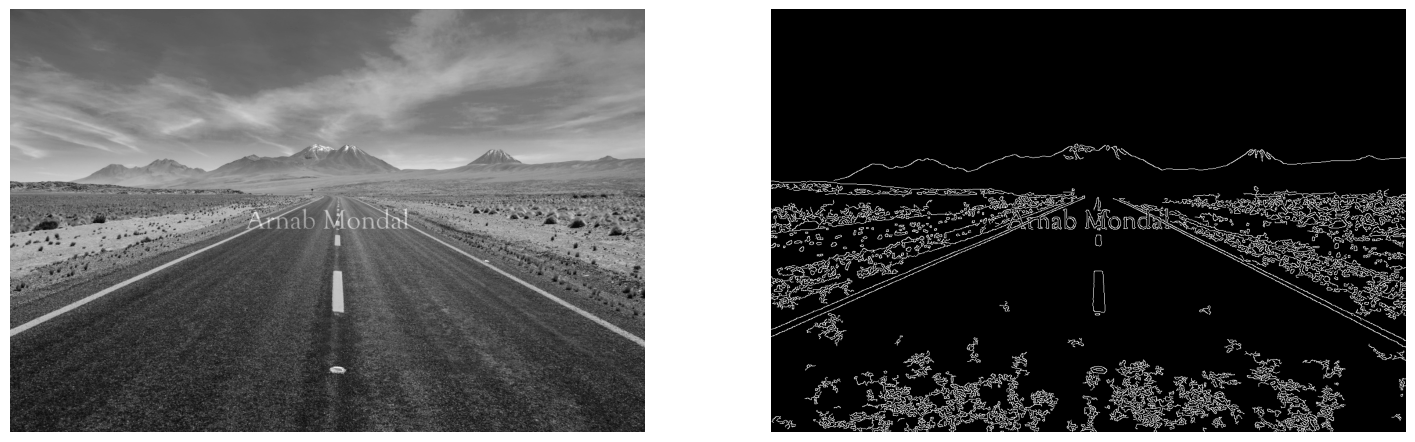

In [6]:
img_path = 'Watermakred_Image.jpg'
#Reading the image
image = cv2.imread(img_path)
(H, W) = image.shape[:2]
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# Perform the canny operator
canny = cv2.Canny(blurred, 30, 150)
#Let’s see the output of the canny edge detector

fig,ax =  plt.subplots(1,2,figsize=(18, 18))
ax[0].imshow(gray,cmap='gray')
ax[1].imshow(canny,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')